# Challenge 2 - TELECOMX

##EXTRACCION DE DATOS

###Incoherencias de los datos - Manejo de Inconsistencias

In [4]:
import requests
import pandas as pd

RAW_URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

resp = requests.get(RAW_URL, timeout=30)
resp.raise_for_status()

payload = resp.json()

if isinstance(payload, list):
    df = pd.json_normalize(payload)

elif isinstance(payload, dict):
    if "data" in payload and isinstance(payload["data"], list):
        df = pd.json_normalize(payload["data"])
    else:
        df = pd.json_normalize(payload)

else:
    raise ValueError("Formato JSON no reconocido (ni lista ni dict).")

print("Columnas:", df.columns.tolist())
print("Filas x Columnas:", df.shape)
df.head()

Columnas: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
Filas x Columnas: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Transformación

###Cuentas Diarias

In [6]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

### Yes - 1 & No -0

In [7]:
df = df.replace({'Yes': 1, 'No': 0})

print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen  customer.Partner  \
0  0002-ORFBO     0          Female                       0                 1   
1  0003-MKNFE     0            Male                       0                 0   
2  0004-TLHLJ     1            Male                       0                 0   
3  0011-IGKFF     1            Male                       1                 1   
4  0013-EXCHZ     1          Female                       1                 1   

   customer.Dependents  customer.tenure  phone.PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone.MultipleLines internet.InternetService  ... internet.DeviceProtection  \
0                   0                      DSL  ...  

/tmp/ipython-input-2579048428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


## Carga y Analisis

### Analisis Descriptivo

In [8]:
df.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


### Distribución de evasión

/tmp/ipython-input-1169204263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")


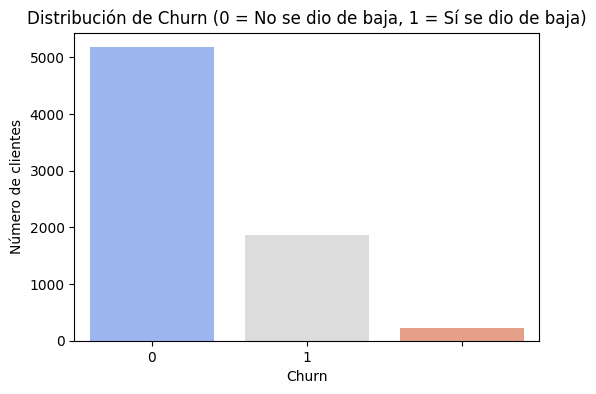

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo
churn_counts = df['Churn'].value_counts()

# Gráfico
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")

plt.title("Distribución de Churn (0 = No se dio de baja, 1 = Sí se dio de baja)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()


### Recuento de Evasión

📌 Columnas categóricas encontradas: ['customer.gender', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']


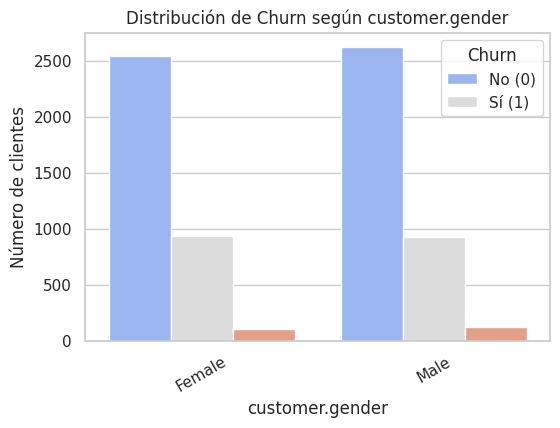

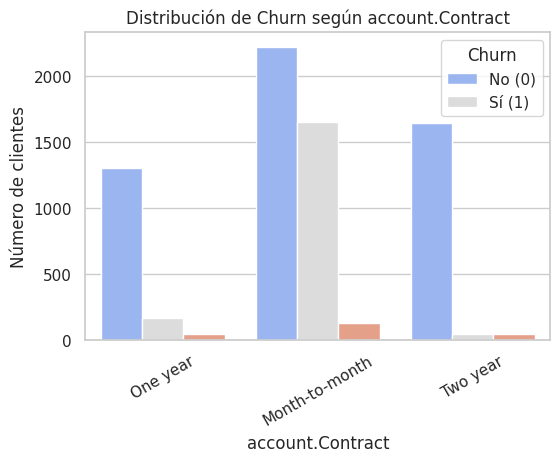

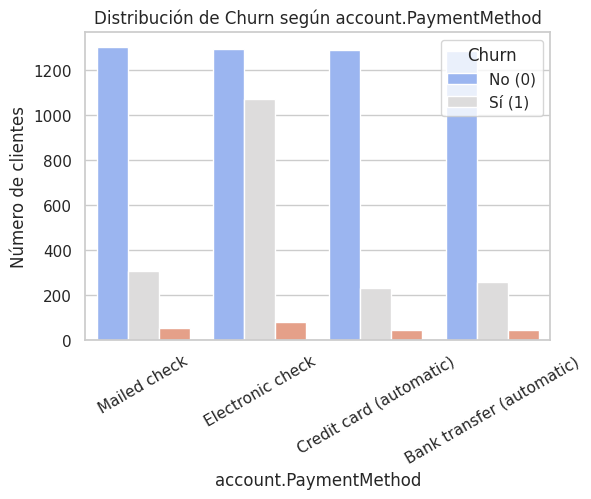

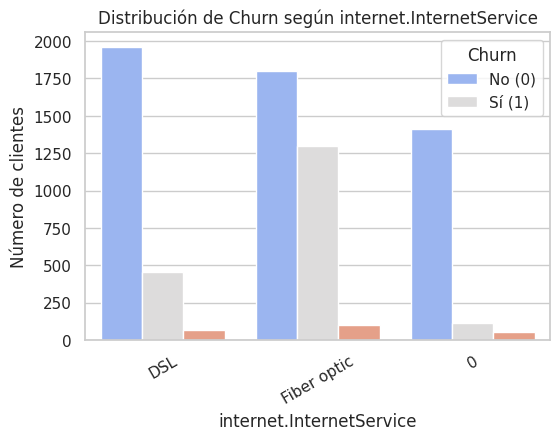


📌 Proporción de Churn por customer.gender:
Churn                0      1      
customer.gender                    
Female           70.96  26.14  2.90
Male             71.43  25.31  3.27

📌 Proporción de Churn por account.Contract:
Churn                 0      1      
account.Contract                    
Month-to-month    55.43  41.32  3.25
One year          86.04  10.93  3.03
Two year          94.49   2.75  2.75

📌 Proporción de Churn por account.PaymentMethod:
Churn                          0      1      
account.PaymentMethod                        
Bank transfer (automatic)  80.93  16.24  2.83
Credit card (automatic)    82.27  14.80  2.93
Electronic check           52.92  43.80  3.27
Mailed check               78.32  18.50  3.18

📌 Proporción de Churn por internet.InternetService:
Churn                         0      1      
internet.InternetService                    
0                         89.37   7.15  3.48
DSL                       78.86  18.45  2.69
Fiber optic            

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categoricas = ['customer.gender', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']

categoricas = [col for col in categoricas if col in df.columns]
print("📌 Columnas categóricas encontradas:", categoricas)

# ========= Gráficos de distribución de Churn por variable =========
sns.set(style="whitegrid")

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="coolwarm")
    plt.title(f"Distribución de Churn según {col}")
    plt.xlabel(col)
    plt.ylabel("Número de clientes")
    plt.xticks(rotation=30)
    plt.legend(title="Churn", labels=["No (0)", "Sí (1)"])
    plt.show()

# ========= 3) Tablas de proporciones de churn =========
for col in categoricas:
    print(f"\n📌 Proporción de Churn por {col}:")
    tabla = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(tabla.round(2))

### Conteo de Evasión

📌 Analizando estas columnas: ['customer.tenure']


/tmp/ipython-input-1365296975.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")


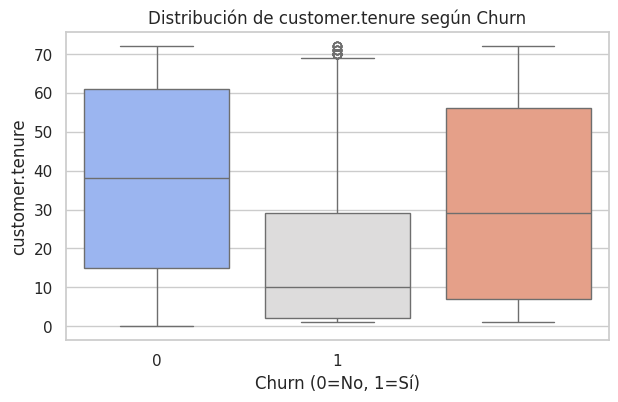

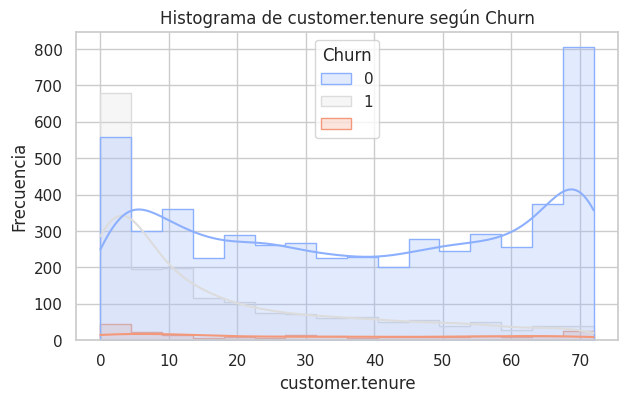

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Variables de interés =========
numericas = ['customer.tenure', 'TotalCharges']  # Ajusta 'TotalCharges' si tu columna se llama distinto

# Filtrar solo las que existan en el DataFrame
numericas = [col for col in numericas if col in df.columns]
print("📌 Analizando estas columnas:", numericas)

sns.set(style="whitegrid")

for col in numericas:
    # Boxplot
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel("Churn (0=No, 1=Sí)")
    plt.ylabel(col)
    plt.show()

    # Histograma
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue="Churn", element="step", kde=True, palette="coolwarm")
    plt.title(f"Histograma de {col} según Churn")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

## INFORME

### INTRODUCCIÓN

El objetivo de este análisis es entender y reducir la evasión de clientes (Churn) en TelecomX LATAM. Exploramos el comportamiento de los clientes, la relación entre variables de contrato/pago/servicios y la probabilidad de cancelación, para proponer acciones tácticas y estratégicas que mejoren la retención.

### LIMPIEZA DE DATOS

	•	Fuente: Archivo JSON estructurado por cliente (demografía, servicios y facturación).
	•	Normalización: Se aplanó la estructura anidada (p. ej., customer.*, internet.*, account.*).
	•	Etiquetas: Churn se convirtió a binario (0 = permanece, 1 = cancela), eliminando registros sin etiqueta.
	•	Variables numéricas: Conversión a numérico de cargos mensuales y totales.
	•	Nueva métrica: Cuentas_Diarias = account.Charges.Monthly / 30 (promedio mensual de 30 días).
	•	Mapeos: Donde aplicaba, se transformó Yes/No → 1/0 en campos binarios.

### ANALISIS DATOS


	•	Registros analizados: 7267
	•	Tasa global de churn: ≈26%

#### ANALISIS DE DATOS - POR VARIABLE


	•	En account.Contract, la categoría Month-to-month registra la tasa de churn más alta.
	•	En account.PaymentMethod, ciertos métodos concentran mayor churn (ej. Electronic check).
	•	En internet.InternetService, clientes con Fiber optic muestran una tasa de churn superior frente a DSL.
	•	En customer.gender, no se observan grandes diferencias de churn entre hombres y mujeres.
	•	Tiempo de contrato (tenure): los clientes con menor tenure tienden a concentrar mayor churn; al aumentar la antigüedad, la probabilidad de cancelación disminuye.
	•	Total gastado: se observan diferencias de distribución entre grupos (Churn=0 vs Churn=1); valores extremos pueden asociarse a perfiles específicos.

### CONCLUSIONES

	•	El churn global ronda un cuarto de la base de clientes.
	•	El tipo de contrato es un impulsor importante: clientes con contratos mensuales tienen mucha más propensión a cancelar que los de 1 o 2 años.
	•	El método de pago influye: algunos métodos presentan churn elevado, lo que sugiere riesgos asociados.
	•	El tipo de servicio de internet también segmenta: Fiber optic muestra mayor churn que DSL.
	•	La antigüedad (tenure) es un fuerte predictor: los clientes recientes son más propensos a cancelar.


### RECOMENDACIONES


	1.	Incentivos de permanencia: campañas para migrar clientes Month-to-month a contratos de 1–2 años (bonos de instalación, descuentos temporales).
	2.	Alertas tempranas: monitorear clientes de bajo tenure y contacto proactivo (onboarding reforzado, tutorías de uso, check-ins).
	3.	Revisión de métodos de pago: ofrecer beneficios al migrar a alternativas con menor riesgo (ej. débito automático).
	4.	Segmentación por servicio de internet: planes personalizados para clientes con churn elevado (ajustes de precio/velocidad o bundles con valor agregado).
	5.	Programa de lealtad: recompensas por antigüedad y paquetes cruzados (móvil + internet + TV) para aumentar el costo de oportunidad de cancelar.